In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from utils import preprocess

In [28]:
df = pd.read_csv('../DATA/training.1600000.processed.noemoticon.csv', encoding='latin', header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


In [29]:
df = df.rename(columns={0:"category", 1:"id", 2:"date", 3:"idk", 4:"author", 5:"content"})
df.head()

,category,id,date,idk,author,content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


In [30]:
def calc_miss(df):
    
    miss_df = (df.isna().sum() / df.isna().count() * 100).reset_index().rename(columns={"index":"cols", 0:"miss%"}).sort_values(by="miss%", ascending=False)
    return miss_df

calc_miss(df)

,cols,miss%
0,category,0.0
1,id,0.0
2,date,0.0
3,idk,0.0
4,author,0.0
5,content,0.0


In [31]:
pd.set_option('display.max_colwidth', -1)
df[df['category'] == 4]['content'].head()

<ipython-input-31-21a5af2b0799>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


800000    I LOVE @Health4UandPets u guys r the best!!                                                                                              
800001    im meeting up with one of my besties tonight! Cant wait!!  - GIRL TALK!!                                                                 
800002    @DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart. 
800003    Being sick can be really cheap when it hurts too much to eat real food  Plus, your friends make you soup                                 
800004    @LovesBrooklyn2 he has that effect on everyone                                                                                           
Name: content, dtype: object

In [32]:
df[df['category'] == 0]['content'].head()

0    @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
1    is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!    
2    @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds                          
3    my whole body feels itchy and like its on fire                                                                     
4    @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.     
Name: content, dtype: object

In [33]:
print(f'Shape of data before sampling : {df.shape}')

df = df.sample(n=200000, random_state=42)

print(f'Shape of data after sampling : {df.shape}')

Shape of data before sampling : (1600000, 6)
Shape of data after sampling : (200000, 6)


In [34]:
df['category'] = df['category'].replace([0, 4], ['Negative', 'Positive'])
df.head()

,category,id,date,idk,author,content
541200,Negative,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!
750,Negative,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps for my razr 2"
766711,Negative,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,"@TiannaChaos i know just family drama. its lame.hey next time u hang out with kim n u guys like have a sleepover or whatever, ill call u"
285055,Negative,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography stuff on there to revise! *Stupid School* :'(
705995,Negative,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem


In [35]:
df[df['content'] == '']

,category,id,date,idk,author,content


In [36]:
df[df['content'] == ' ']

,category,id,date,idk,author,content


In [37]:
print(f'Number of duplicates in the dataset : {df.duplicated().sum()}')

Number of duplicates in the dataset : 0


In [38]:
df = df[['category', 'content']]
df.head()

,category,content
541200,Negative,@chrishasboobs AHHH I HOPE YOUR OK!!!
750,Negative,"@misstoriblack cool , i have no tweet apps for my razr 2"
766711,Negative,"@TiannaChaos i know just family drama. its lame.hey next time u hang out with kim n u guys like have a sleepover or whatever, ill call u"
285055,Negative,School email won't open and I have geography stuff on there to revise! *Stupid School* :'(
705995,Negative,upper airways problem


In [39]:
targets = {"Negative" : 0, "Positive":1}
df['target'] = df['category'].apply(lambda x: targets[x])

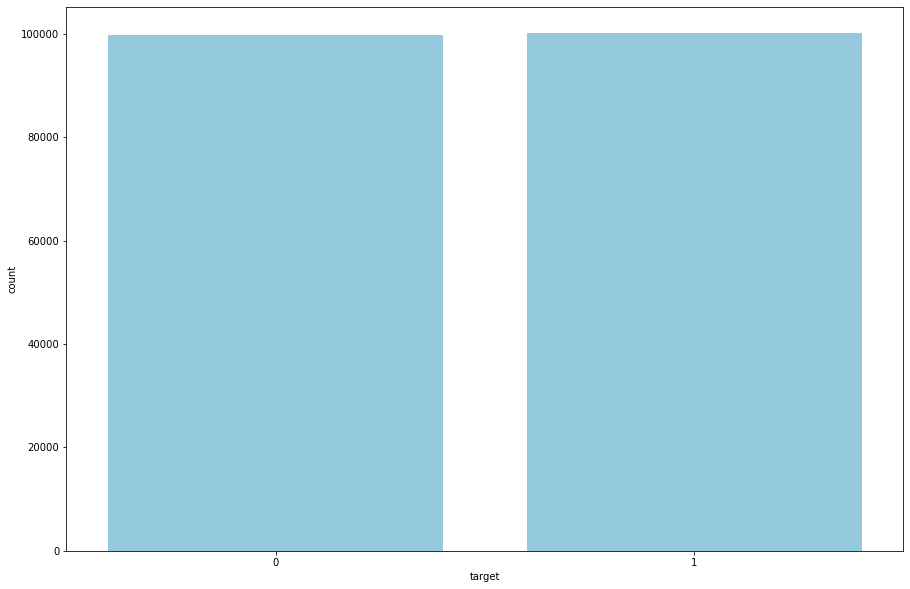

In [40]:
plt.figure(figsize=(15, 10))
sns.countplot(x="target", data=df, color="skyblue")
plt.show()

In [41]:
df['text'] = df['content'].apply(lambda x: preprocess(x))
df.head()

,category,content,target,text
541200,Negative,@chrishasboobs AHHH I HOPE YOUR OK!!!,0,ahh i hope your ok
750,Negative,"@misstoriblack cool , i have no tweet apps for my razr 2",0,cool i have no tweet app for my razr
766711,Negative,"@TiannaChaos i know just family drama. its lame.hey next time u hang out with kim n u guys like have a sleepover or whatever, ill call u",0,i know just famili drama it lame hey next time u hang out with kim n u guy like have a sleepov or whatev ill call u
285055,Negative,School email won't open and I have geography stuff on there to revise! *Stupid School* :'(,0,school email would not open and i have geographi stuff on there to revis stupid school
705995,Negative,upper airways problem,0,upper airway problem


In [42]:
df.drop(["category", "content"], inplace=True, axis=1)
df.head()

,target,text
541200,0,ahh i hope your ok
750,0,cool i have no tweet app for my razr
766711,0,i know just famili drama it lame hey next time u hang out with kim n u guy like have a sleepov or whatev ill call u
285055,0,school email would not open and i have geographi stuff on there to revis stupid school
705995,0,upper airway problem


In [43]:
df[df['text'] == '']

,target,text
1574260,1,
897097,1,
1275219,1,
1331724,1,
395563,0,
...,...,...
978951,1,
374786,0,
329988,0,
705979,0,


In [44]:
df_new = df.loc[df['text'] != '']

In [49]:
df_new[df_new['text'] == '']

,target,text


In [50]:
df[df['text'] == '']

,target,text
1574260,1,
897097,1,
1275219,1,
1331724,1,
395563,0,
...,...,...
978951,1,
374786,0,
329988,0,
705979,0,


In [52]:
df_new.shape

(199475, 2)

In [54]:
df_train, df_test = train_test_split(df_new, test_size=0.02, stratify=df_new['target'], random_state=42)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=42)


print(f'Shape of Training data : {df_train.shape}')
print(f'Shape of Validation Data : {df_val.shape}')
print(f'Shape of Test Data : {df_test.shape}')

Shape of Training data : (195485, 2)
Shape of Validation Data : (1995, 2)
Shape of Test Data : (1995, 2)


In [55]:
df_train.to_csv("../DATA/train.csv", index=False)
df_val.to_csv("../DATA/valid.csv", index=False)
df_test.to_csv("../DATA/test.csv", index=False)

<AxesSubplot:xlabel='target', ylabel='count'>

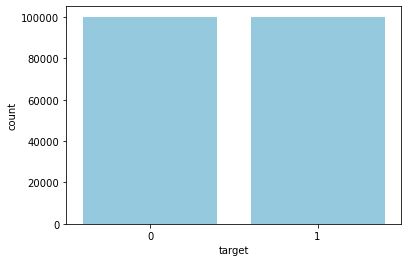

In [56]:
sns.countplot(x="target", data=df, color="skyblue")